In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as MinMaxScaler

In [2]:
cus_data = pd.read_csv('Customers.csv')
pro_data = pd.read_csv('Products.csv')
trans_data = pd.read_csv('Transactions.csv')

In [3]:
merged = pd.merge(cus_data , trans_data , on = 'CustomerID' , how = 'left' )
merged.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2.0,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3.0,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2.0,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2.0,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64


In [4]:
merged = pd.merge(merged , pro_data , on = 'ProductID' , how = 'left')
merged.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2.0,114.60,57.30,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3.0,412.62,137.54,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2.0,614.94,307.47,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2.0,911.44,455.72,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64,TechPro Headphones,Electronics,433.64


In [5]:
total_spending = merged.groupby("CustomerID")["TotalValue"].sum().rename("TotalSpending")

In [6]:
merged.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2.0,114.60,57.30,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3.0,412.62,137.54,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2.0,614.94,307.47,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2.0,911.44,455.72,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,433.64,TechPro Headphones,Electronics,433.64


In [7]:
transaction_count = merged.groupby("CustomerID")["TransactionID"].nunique().rename("TransactionCount")


In [8]:
transaction_count

CustomerID
C0001    5
C0002    4
C0003    4
C0004    8
C0005    3
        ..
C0196    4
C0197    3
C0198    2
C0199    4
C0200    5
Name: TransactionCount, Length: 200, dtype: int64

In [9]:
category_prefs = merged.pivot_table(
    index="CustomerID", 
    columns="Category", 
    values="Quantity", 
    aggfunc="sum", 
    fill_value=0
)

In [10]:
category_prefs

Category,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,2.0,0.0,7.0,3.0
C0002,0.0,4.0,0.0,6.0
C0003,0.0,4.0,4.0,6.0
C0004,8.0,0.0,6.0,9.0
C0005,0.0,0.0,4.0,3.0
...,...,...,...,...
C0196,3.0,4.0,0.0,5.0
C0197,0.0,0.0,6.0,3.0
C0198,0.0,2.0,1.0,0.0


In [11]:
customer_features = pd.concat([total_spending, transaction_count, category_prefs], axis=1).fillna(0)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(customer_features)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(normalized_features)
similarity_matrix

array([[1.        , 0.61366218, 0.83534935, ..., 0.73499171, 0.85317792,
        0.68918523],
       [0.61366218, 1.        , 0.91418955, ..., 0.71768923, 0.85631843,
        0.85811688],
       [0.83534935, 0.91418955, 1.        , ..., 0.78375711, 0.92296382,
        0.84625124],
       ...,
       [0.73499171, 0.71768923, 0.78375711, ..., 1.        , 0.61509812,
        0.84780402],
       [0.85317792, 0.85631843, 0.92296382, ..., 0.61509812, 1.        ,
        0.69339468],
       [0.68918523, 0.85811688, 0.84625124, ..., 0.84780402, 0.69339468,
        1.        ]])

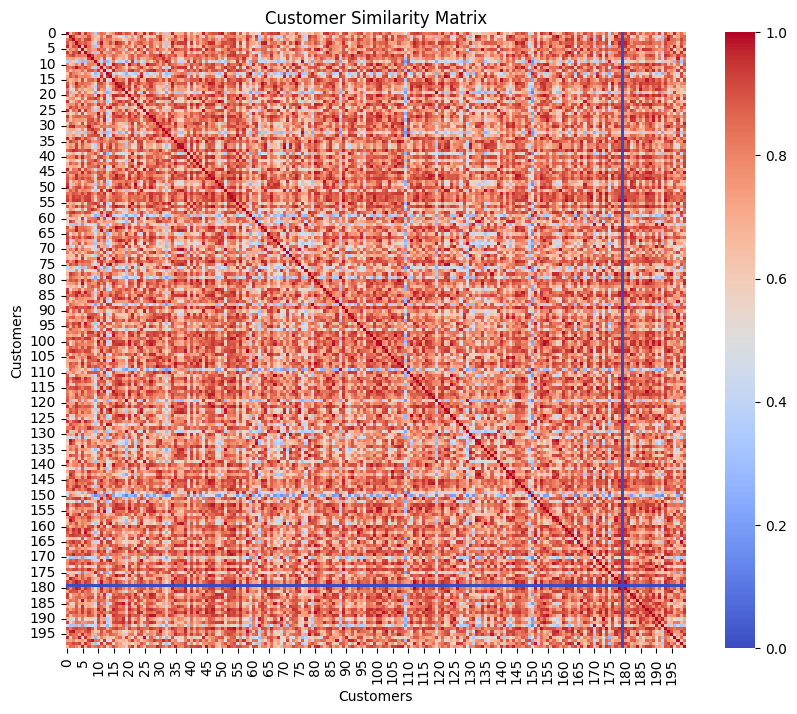

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Customer Similarity Matrix")
plt.xlabel("Customers")
plt.ylabel("Customers")
plt.show()

In [15]:
customer_indices = {id: index for index, id in enumerate(customer_features.index)}

In [16]:
lookalike_data = {}

for customer_id, idx in customer_indices.items():
    # used similarity_matrix for similarity finding
    similarities = similarity_matrix[idx]
    
    similar_customers = sorted(
        [(other_id, score) for other_id, score in zip(customer_features.index, similarities) if other_id != customer_id],
        key=lambda x: x[1],
        reverse=True
    )
    lookalike_data[customer_id] = similar_customers[:3]

In [17]:
lookalike_output = pd.DataFrame.from_dict(lookalike_data, orient="index", columns=["Lookalike1", "Lookalike2", "Lookalike3"])


In [18]:
lookalike_output

,Lookalike1,Lookalike2,Lookalike3
C0001,"(C0157, 0.9826890972027376)","(C0051, 0.9819806820138273)","(C0045, 0.9736695943853616)"
C0002,"(C0159, 0.993513362432765)","(C0133, 0.9891854321521605)","(C0178, 0.9760948152169361)"
C0003,"(C0195, 0.9808590449783848)","(C0170, 0.9722581368613677)","(C0031, 0.9721344065353366)"
C0004,"(C0146, 0.9841560449730402)","(C0075, 0.9836866621908221)","(C0012, 0.9807935359329256)"
C0005,"(C0007, 0.9913811858093978)","(C0127, 0.9793716724272801)","(C0197, 0.9787648219706806)"
...,...,...,...
C0196,"(C0185, 0.9911472224302085)","(C0079, 0.9878806933727501)","(C0182, 0.9785574503149305)"
C0197,"(C0026, 0.9854276012924853)","(C0005, 0.9787648219706806)","(C0140, 0.9724524234938121)"
C0198,"(C0088, 0.9821806358281902)","(C0009, 0.980023993692407)","(C0092, 0.9678949092671778)"
C0199,"(C0095, 0.9928351535169918)","(C0166, 0.9922194632580005)","(C0152, 0.9797198961738462)"


In [19]:
lookalike_output["Lookalike1_Score"] = lookalike_output["Lookalike1"].apply(lambda x: x[1])
lookalike_output["Lookalike2_Score"] = lookalike_output["Lookalike2"].apply(lambda x: x[1])
lookalike_output["Lookalike3_Score"] = lookalike_output["Lookalike3"].apply(lambda x: x[1])

In [20]:
final_output = lookalike_output.applymap(lambda x: x[0] if isinstance(x, tuple) else x)

final_output.head(20).to_csv("Lookalike.csv", index_label="CustomerID")

C:\Users\bhuva\AppData\Local\Temp\ipykernel_22148\2011772080.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_output = lookalike_output.applymap(lambda x: x[0] if isinstance(x, tuple) else x)


In [27]:
data = pd.read_csv('Lookalike.csv')
data.head()

,CustomerID,Lookalike1,Lookalike2,Lookalike3,Lookalike1_Score,Lookalike2_Score,Lookalike3_Score
0,C0001,C0157,C0051,C0045,0.982689,0.981981,0.973670
1,C0002,C0159,C0133,C0178,0.993513,0.989185,0.976095
2,C0003,C0195,C0170,C0031,0.980859,0.972258,0.972134
3,C0004,C0146,C0075,C0012,0.984156,0.983687,0.980794
4,C0005,C0007,C0127,C0197,0.991381,0.979372,0.978765


C:\Users\bhuva\AppData\Local\Temp\ipykernel_22148\3068563538.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Lookalike", y="Score", data=melted_scores, palette="viridis")


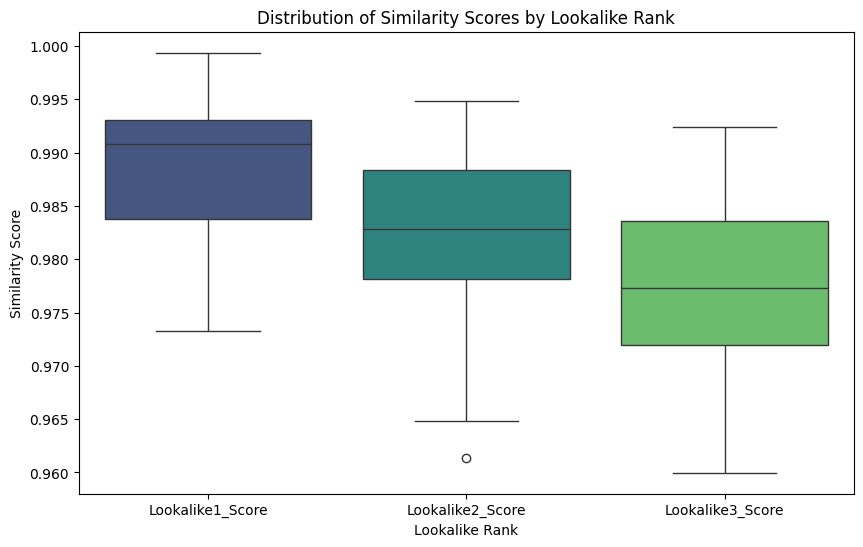

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
lookalike_data = pd.read_csv("Lookalike.csv")

melted_scores = lookalike_data.melt(
    id_vars=["CustomerID"], 
    value_vars=["Lookalike1_Score", "Lookalike2_Score", "Lookalike3_Score"], 
    var_name="Lookalike", 
    value_name="Score"
)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Lookalike", y="Score", data=melted_scores, palette="viridis")
plt.title("Distribution of Similarity Scores by Lookalike Rank")
plt.ylabel("Similarity Score")
plt.xlabel("Lookalike Rank")
plt.show()
